In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import foldnorm

First of all,
$$\mathbb P(|Z| > t) = 2\mathbb P(Z < -t) = 2\Phi(-t)$$
where $\Phi$ is the CDF for $Z\sim N(0,1)$. Let's plot this.

In [29]:
x = np.linspace(0, 3, 10000)

In [30]:
y = 2 * norm.cdf(-x)

Text(0, 0.5, 'Probability that $|Z|>t$')

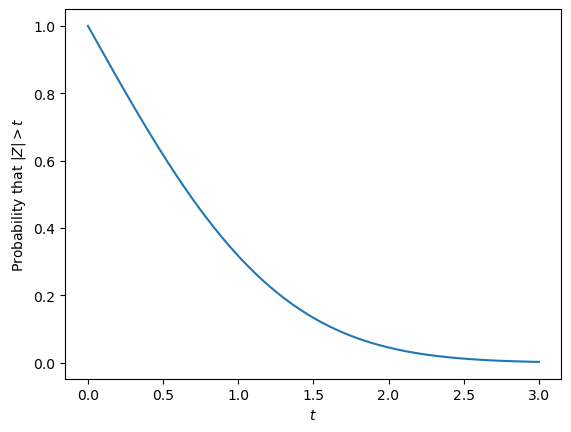

In [31]:
plt.plot(x, y)
plt.xlabel(r'$t$')
plt.ylabel(r'Probability that $|Z|>t$')

Now let's compare to Markov's inequality. If $X\sim N(0,1)$ then $|X|$ has a folded normal distribution. We can use scipy.stats's foldnorm to to get the moments of such a random variable.

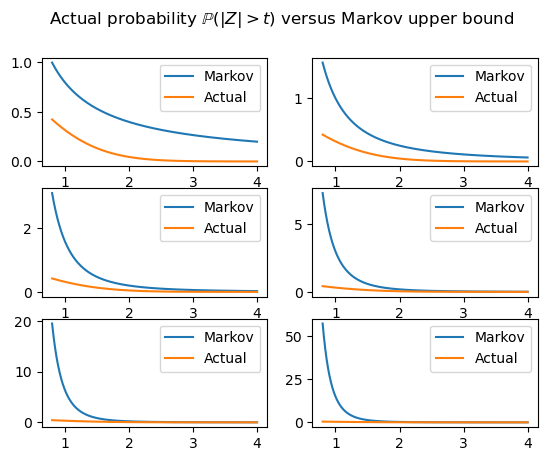

In [54]:
x = np.linspace(0.8, 4, 10000)
fig, axs = plt.subplots(3, 2)

fig.suptitle(r"Actual probability $\mathbb{P}(|Z| > t)$ versus Markov upper bound")

for k in range(6):
    e = foldnorm.moment(order=k+1, c=0)
    y = e / x**(k+1)
    
    ax = axs[k // 2][k % 2]
    ax.plot(x, y, label='Markov')
    ax.plot(x, 2*norm.cdf(-x), label='Actual')
    ax.legend()

Here is a picture of some of those Markov upper bounds plotted together.

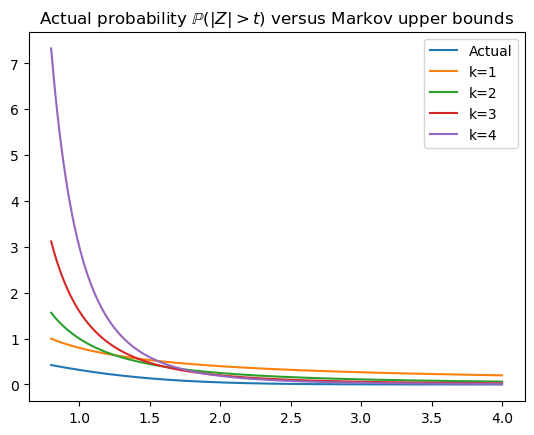

In [58]:
x = np.linspace(0.8, 4, 10000)
plt.title(r"Actual probability $\mathbb{P}(|Z| > t)$ versus Markov upper bounds")
plt.plot(x, 2*norm.cdf(-x), label='Actual')

for k in range(4):
    e = foldnorm.moment(order=k+1, c=0)
    y = e / x**(k+1)
    plt.plot(x, y, label=f'k={k+1}')

plt.legend()

Finally we'll plot the bound from Mill's inequality.

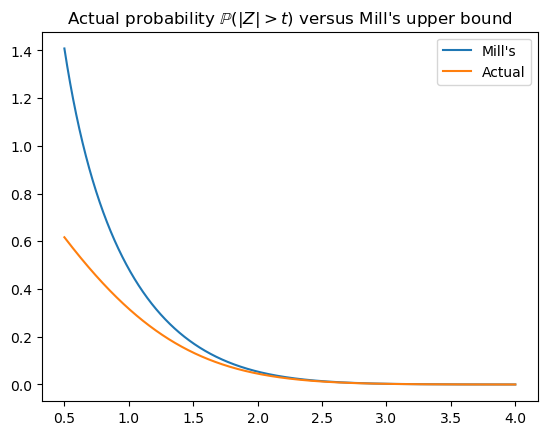

In [63]:
plt.title(r"Actual probability $\mathbb{P}(|Z| > t)$ versus Mill's upper bound")
x = np.linspace(0.5, 4, 10000)
y = np.sqrt(2/np.pi) * np.exp(-x**2 / 2) / x
plt.plot(x, y, label="Mill's")
plt.plot(x, 2 * norm.cdf(-x), label="Actual")
plt.legend()